<a href="https://colab.research.google.com/github/Sayso16/CISM-623-PRACTCAL-LAB-2/blob/main/CISM_623_Practical_Lab_2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#CISM 623 MACHINE LEARNING

#Practical Lab 2

#RP SEISO

#**32577443**


In [375]:
##1 Dataset Selection--
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [376]:
##Exploratory Data Analysis EDA
# 2 Load dataset
iris = load_iris()

print("1. Iris dataset OVERVIEW:\n")

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

print(f"Dataset shape: {df.shape}")
print(f"Features: {iris.feature_names}")
print(f"Target classes: {iris.target_names}")
print("\nFirst 5 rows:")
print(df.head())

1. Iris dataset OVERVIEW:

Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

First 5 rows:
   sepal length (cm)  sepal width (cm)  ...  target  species
0                5.1               3.5  ...       0   setosa
1                4.9               3.0  ...       0   setosa
2                4.7               3.2  ...       0   setosa
3                4.6               3.1  ...       0   setosa
4                5.0               3.6  ...       0   setosa

[5 rows x 6 columns]


In [377]:
print("2 Mssing Values\n")

print(df.isnull().sum())

2 Mssing Values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


There is no missing value detected n the dataset. Thus no handling is required.

In [378]:
print("3. Feature Types\n")
print(df.dtypes)

3. Feature Types

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
species               object
dtype: object


all 4 features are continuous numerical values (float64), and since "target" and "Species" represent the same thing. the target feature is categorical (target (int64) and species (object): target maps species (0 represents setosa, 1 represent versicolor, 2 represent virginica))



4. Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


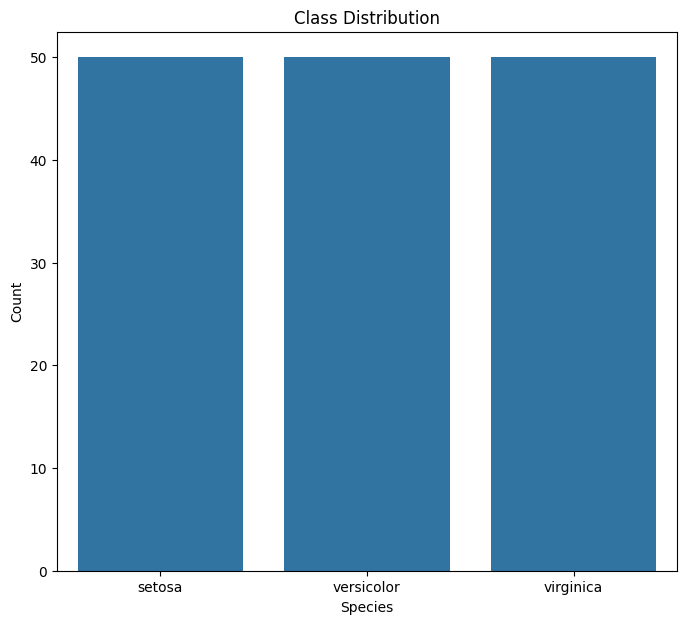

In [379]:
print("\n4. Class Distribution:")
class_distribution = df['species'].value_counts()
##class_distribution = df['target'].value_counts()
print(class_distribution)

##Plot Uusng Seaborn
plt.figure(figsize= (8,7))
sns.countplot(data = df, x = "species")
##sns.countplot(data = df, x = "target")
plt.title("Class Distribution")
plt.ylabel('Count')
plt.xlabel("Species")
plt.show()

This shows that the dataset is perfectly  balanceed , with 50 samples per class

In [380]:
print("\n 5. Descriptive Statistics:")
#print(df.describe())
discriptive_stats = df.describe()
##print(df[iris.feature_names].describe())
print(discriptive_stats)

print("\nAdditional Statistics:")
print("Median:\n", df[iris.feature_names].median())
print("\nMode:\n", df[iris.feature_names].mode().iloc[0])


 5. Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]

Additional Statistics:
Median:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Mode:
 sepal length (cm)    5.0
sepal width (cm)     3.0
petal length (cm)    1.4
petal width 


6. Visualization

 Histograms for features


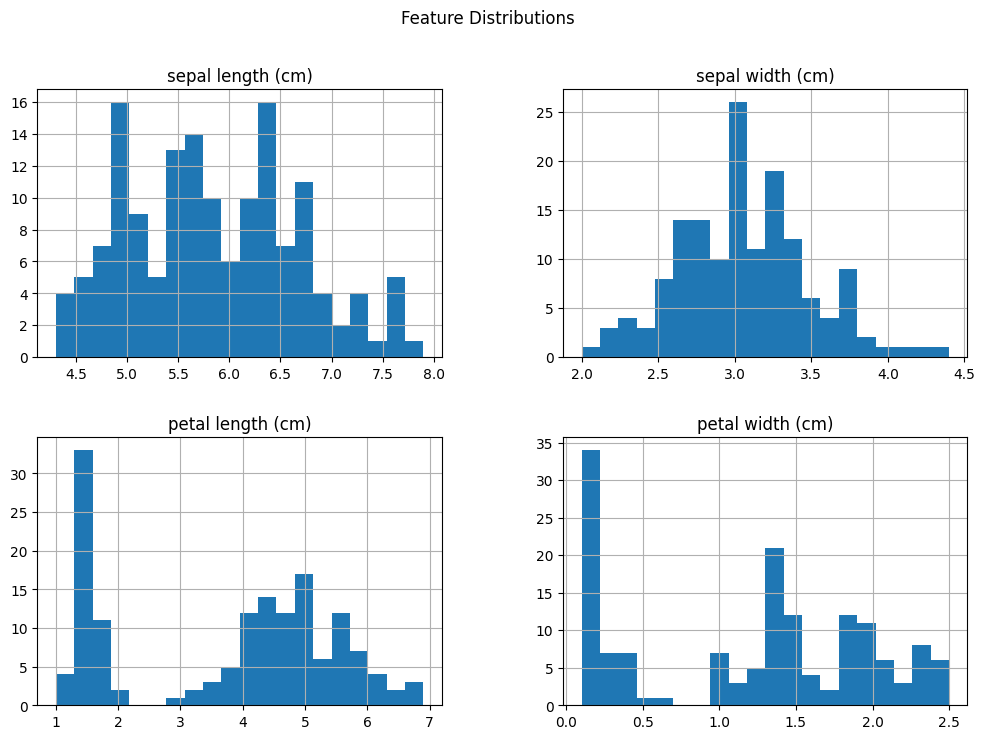

In [381]:
print("\n6. Visualization")

print("\n Histograms for features")

df[iris.feature_names].hist(bins=20, figsize=(12, 8))
plt.suptitle('Feature Distributions')
plt.show()


Boxplots


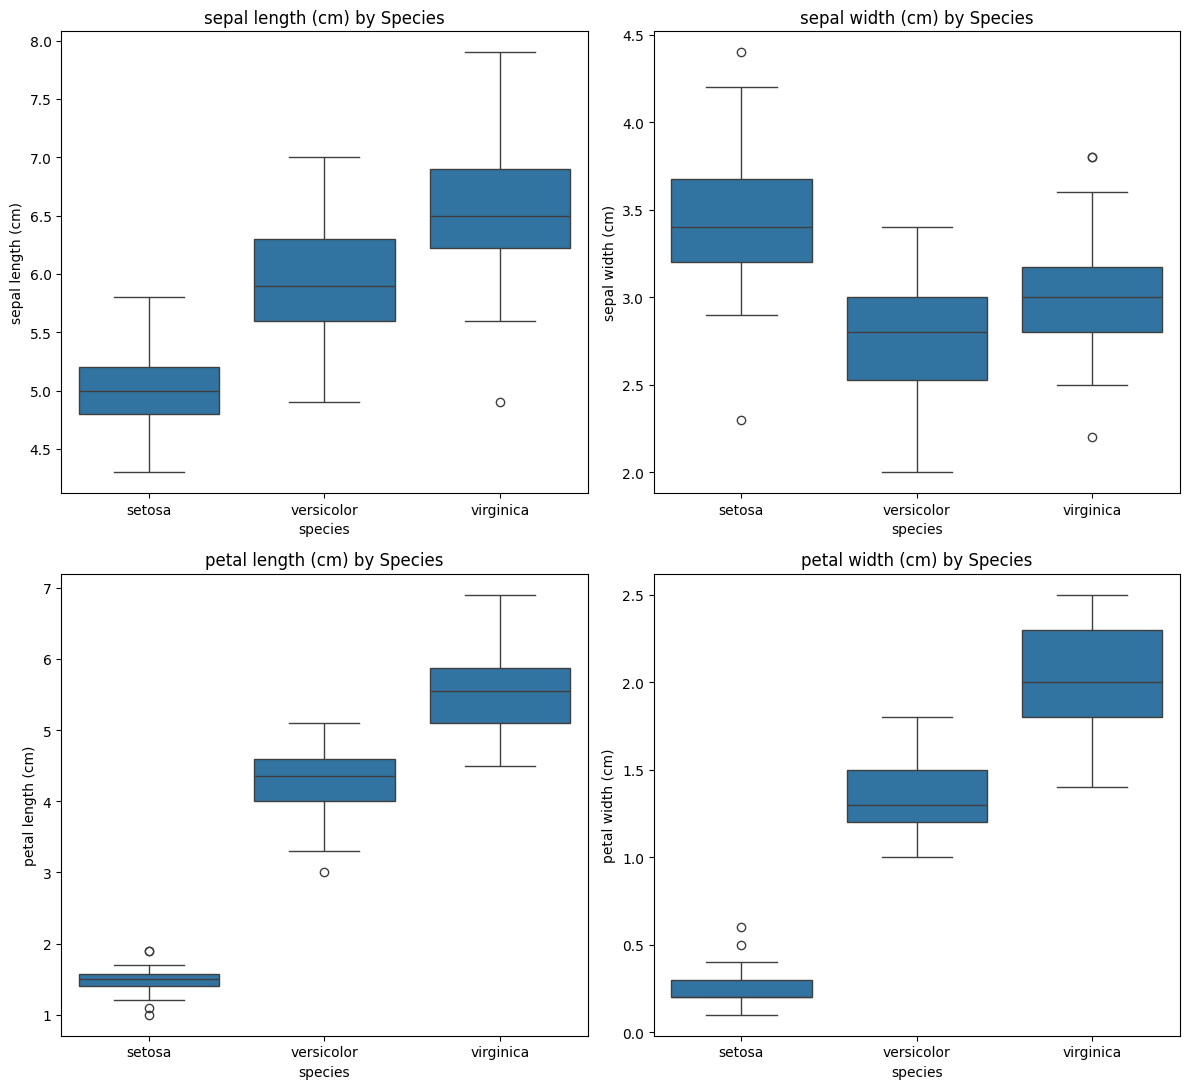

In [382]:
'''
print("\nBoxplots")
plt.figure(figsize = (12, 11))
df_melted = pd.melt(df, id_vars = ['species'], value_vars= iris.feature_names)
sns.boxplot(data = df_melted, x = 'variable', y = 'value', hue = 'species')
plt.title("Boxplots")
plt.tight_layout()
plt.xticks(rotation = 30)
plt.show()
'''
print("\nBoxplots")
figure, axes = plt.subplots(2, 2, figsize =(12,11))
##using a for loop
for i, feature in enumerate(iris.feature_names):
    row = i // 2
    col = i % 2
    sns.boxplot(data = df, x = 'species', y = feature, ax = axes[row, col])
    axes[row, col].set_title(f"{feature} by Species")
plt.tight_layout()
plt.show()


Correlation heatmap


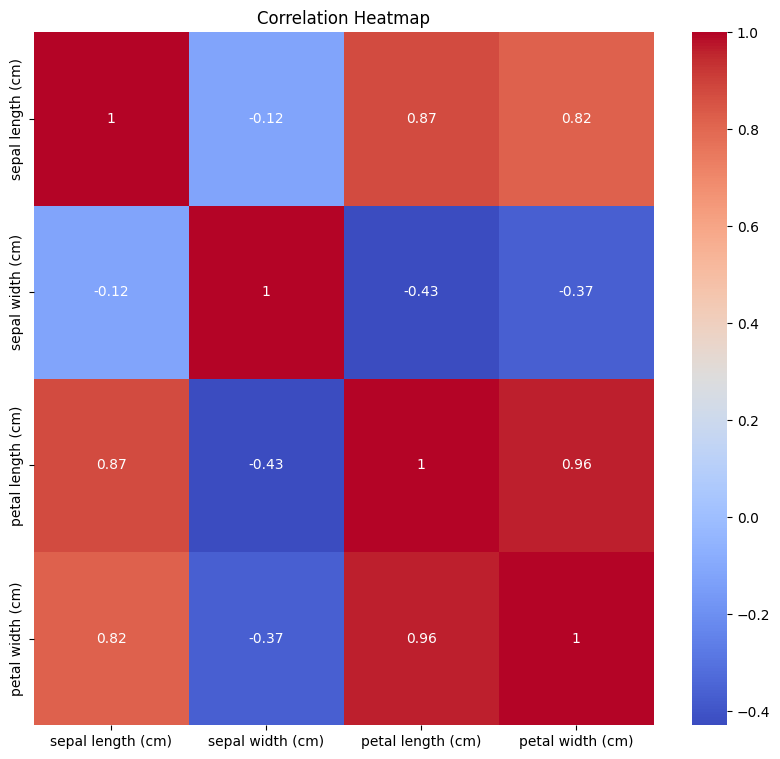

In [383]:
print("\nCorrelation heatmap")
plt.figure(figsize = (10, 9))
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Key Insights




# 3. Data Processing

In [384]:
print("\n 1. Handle Missing values \n")

print("from 2.1 We saw that there is no missing value in the dataset, thus no dropping ot imputaton is required")


 1. Handle Missing values 

from 2.1 We saw that there is no missing value in the dataset, thus no dropping ot imputaton is required


In [385]:
print("\n 2 Encoding categorical Variables\n")

##Separate the variables
x= df[iris.feature_names]
y= df['target']

print("Target is already label encoded (0, 1, 2) thus there s no need for addtional encoding")
print("Unique values in terget: ", np.unique(y))
print("Mapping: 0 = setosa, 1 = versicolor, 2 = virginica" )



 2 Encoding categorical Variables

Target is already label encoded (0, 1, 2) thus there s no need for addtional encoding
Unique values in terget:  [0 1 2]
Mapping: 0 = setosa, 1 = versicolor, 2 = virginica


In [386]:
from sklearn.preprocessing import StandardScaler


print("\n 3. Normalize features\n")

##Initialize the scaler
scaler = StandardScaler()
##Fit and transform the features
x_scaled = scaler.fit_transform(x)
##Create a dataframe wth scaled features for better reading
x_scaled_df = pd.DataFrame(x_scaled, columns = iris.feature_names)

print("original data: 5 top rows\n", x.head())
print("\nStandardized data : top 5 rows\n", x_scaled_df.head())
print("\nStandardized data - \nMean:\n", x_scaled_df.mean(), "\nstd: \n",x_scaled_df.std())


 3. Normalize features

original data: 5 top rows
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Standardized data : top 5 rows
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

St

In [387]:
from sklearn.model_selection import train_test_split

print("\n 4. Splitting the data for trainging and testiong\n")

##split the dataset
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42, stratify=y)

print("Dataset split completed")
print("x_train shape: ", x_train.shape , ": ", "y_trian shape", y_train.shape)
print("x_test shape: ", x_test.shape, ":", "y_test shape", y_test.shape)

##print("\nClass distribution in y_train\n", pd.Series(y_train.value_counts().sort_index()))
print(f"\nClass distribution in y_train\n{pd.Series(y_train.value_counts().sort_index())}")
print(f"\n Class distribution in y_test \n{pd.Series(y_test).value_counts().sort_index()}")


 4. Splitting the data for trainging and testiong

Dataset split completed
x_train shape:  (120, 4) :  y_trian shape (120,)
x_test shape:  (30, 4) : y_test shape (30,)

Class distribution in y_train
target
0    40
1    40
2    40
Name: count, dtype: int64

 Class distribution in y_test 
target
0    10
1    10
2    10
Name: count, dtype: int64


## 4. MODELING

## 4.1 Choosing classifier

### I am choosing


1.   Linear Regression from Linear model
2.   k-Nearest Neigboues kNN from Instance-based model
3.   Random Forest from Ensemble model





In [388]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [389]:
print(f"Initialize the classifiers wth default parameters")
classifiers = {'Logistic Regression: ' : LogisticRegression(random_state= 42, max_iter = 200),
               'k-Nearest Neighbors: ' : KNeighborsClassifier(),
               'Random Forest: ' : RandomForestClassifier(random_state = 42)}
print(f"\nClassifiers initialized")

Initialize the classifiers wth default parameters

Classifiers initialized


##4.2 Training Models on Training Data

In [390]:
print(f"Training each classifier\n")


#print("**" * 50)
#print(f"\n 1. Training Logistic Regression \n")
#classifiers['Logistic Regression: '].fit(x_train, y_train)
#print("Logstic Regression model trained Successfully")
#print("**" * 50)

#print("**" * 50)
#print(f"\n 2. Training k-Nearest Neigbours\n")
#classifiers['k-Nearest Neighbors: '].fit(x_train, y_train)
#print(" k-Nearest Neighbors model trained Successfully")
#print("**" * 50)

#print("**" * 50)
#print(f"\n 3. Training Random Forest\n")
#classifiers['Random Forest: '].fit(x_train, y_train)
#print(" Random Forest model trained Successfully")
#print("**" * 50)


trained_models = {}
for name, clf in classifiers.items():
  clf.fit(x_train, y_train)
  trained_models[name] = clf
  print(f"{name} tarined successfully")

print(f"\nAll models trained on {x_train.shape[0]} sample")

Training each classifier

Logistic Regression:  tarined successfully
k-Nearest Neighbors:  tarined successfully
Random Forest:  tarined successfully

All models trained on 120 sample


##4.2 Predicting using Test data and Evaluating

In [410]:
results = {}

for name, clf in trained_models.items():
  #Make predictions
  y_predic= clf.predict(x_test)

  #Calculate accuracy
  accuracy = accuracy_score(y_test,y_predic)

  #Store results
  results[name] = {
      'model:' : clf,
      'prediction: ' : y_predic,
      'accuracy: ' : accuracy
  }

  print(f"{name}: Test Accuracy = {accuracy:.3f}")
########################################################################################################
#Commparing performance
print(f"\n" + "**" * 50)
print(f"Model Performance Comparison")
print(f"\n" +"**" * 50 )
for name, result in results.items():
  print(f"{name:20s}: {result['accuracy: ']:.3f}")

print(f"\n" + "**" * 50)
print(f"Model Prediction Comparison")
print(f"\n" +"**" * 50 )
for name, result in results.items():
  print(f"{name:20s}: {result['prediction: ']}")

print(f"\nAll models tested on {y_test.shape[0]} sample")

Logistic Regression: : Test Accuracy = 0.933
k-Nearest Neighbors: : Test Accuracy = 0.933
Random Forest: : Test Accuracy = 0.933

****************************************************************************************************
Model Performance Comparison

****************************************************************************************************
Logistic Regression: : 0.933
k-Nearest Neighbors: : 0.933
Random Forest:      : 0.933

****************************************************************************************************
Model Prediction Comparison

****************************************************************************************************
Logistic Regression: : [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]
k-Nearest Neighbors: : [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 1 2 1 1 0 2 0]
Random Forest:      : [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 2 2 2 1 0 2 0]

All models tested on 30 sample


##4.2 Detailed Ealuation for Each Classifier

In [ ]:
Detailed